In [121]:
%run init.ipynb

In [16]:
import math
import numpy as np
import random

# Apagador quântico

## Obtendo a informação de caminho
O princípio de complementariedade de Bohr diz que não podemos observar o comportamento ondulatório do quanton (as oscilações no gráfico das probabilidades para o interferômetro de Mach-Zehnder (IMZ)) e saber seu caminho usando um único arranjo experimental. Se sabemos por qual caminho o quanton rumou, temos que $Pr(D_{0})=Pr(D_{1})=1/2\ \forall \phi$. Para observarmos o padrão de interferência com máxima visibilidade, não podemos ter nenhuma informação de caminho. 

Podemos obter informação de caminho fazendo uma medida (forte ou fraca) em um dos caminhos, depois do primeiro divisor de feixes. Podemos obter informação de caminho também emaranhando o quanton com outro quanton auxiliar. Por agora, vamos seguir essa última possibilidade aqui. 



Vamos considerar que o __divisor de feixes polarizado (DFP)__ deixa passar fótons com polarização horizontal, $H$, e reflete polarização vertical, $V$, para entrada por qualquer um dos modos espaciais. Veja a figura abaixo.
<img src = 'fig_dfp_.png' width = '250'>
Temos assim que
\begin{align}
U_{dfp}|\psi\rangle & = c_{H0}U_{dfp}|H0\rangle + c_{H1}U_{dfp}|H1\rangle + c_{V0}U_{dfp}|V0\rangle +  c_{V1}U_{dfp}|V1\rangle \\
& = c_{H0}|H0\rangle + c_{H1}|H1\rangle + ic_{V0}|V1\rangle + ic_{V1}|V0\rangle.
\end{align}
Por conseguinte (__Exercício:__ Verifique)
\begin{align}
U_{dfp} & \doteq \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&i \\ 0&0&i&0 \end{bmatrix} = |0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U(\pi,\pi/2,-\pi/2) \\
& = C_{U_{e}} = C_{y}^{12}C_{z}.
\end{align}

Vamos usar a notação
\begin{cases}
\text{A = polarização do fóton A;} \\
\text{A' = modo espacial do fóton A;} \\
\text{B = polarização do fóton B;} \\
\text{B' = modo espacial do fóton B.}
\end{cases}

Uma __placa de meia onda (PMO)__ gira a polarização, no modo espacial no qual ela for colocada, de forma que
\begin{align}
& U_{pmo}|H\rangle = |V\rangle, \\
& U_{pmo}|V\rangle = |H\rangle.
\end{align}
Essa operação, da PMO, é uma CNOT nos graus de liberdade do fóton B:
$$U_{pmo} = X_{B}\otimes|1\rangle_{B'}\langle1| + I_{B}\otimes|0\rangle_{B'}\langle0| = C_{x}^{B'B}.$$

Uma __placa de quarto de onda (PQO)__ atua como segue
\begin{align}
& U_{pqo}|H\rangle = (|H\rangle+i|V\rangle)/\sqrt{2}=|\oplus\rangle, \\
& U_{pqo}|V\rangle = (|H\rangle-i|V\rangle)/\sqrt{2}=|\ominus\rangle.
\end{align}
Ou seja 
$$U_{pqo} = SH.$$

O __cristal não linear (BBO)__ cria pares de fótons gêmeos emaranhados por conversão paramétrica descendente:
$$|\Psi_{+}\rangle_{AB} = \frac{1}{\sqrt{2}}\big(|HV\rangle_{AB}+|VH\rangle_{AB}\big).$$

O sistema que consideraremos está mostrado na figura abaixo.
<img src='fig_apagador.png' width='400'>
Usaremos a notação
$$|H\rangle_{s}=|0\rangle_{s}\text{, } |V\rangle_{s}=|1\rangle_{s} \text{ com } s=A,B.$$
Teremos a seguinte sequência de estados
\begin{align}
BBO:|\psi_{0}\rangle & = \frac{1}{\sqrt{2}}\big(|01\rangle_{AB}+|10\rangle_{AB}\big)|0\rangle_{B'}|0\rangle_{A'}, \\
DFP:|\psi_{1}\rangle & = U_{dfp}^{BB'}|\psi_{0}\rangle \\
& = \frac{1}{\sqrt{2}}\big(|0\rangle_{A}U_{dfp}^{BB'}|10\rangle_{BB'}+|1\rangle_{A}U_{dfp}^{BB'}|00\rangle_{BB'}\big)|0\rangle_{A'} \\
& = \frac{1}{\sqrt{2}}\big(|0\rangle_{A}i|11\rangle_{BB'}+|1\rangle_{A}|00\rangle_{BB'}\big)|0\rangle_{A'}, \\
& = \text{ estado genuinamente emaranhado nos 3 graus de liberdade} \\
PMO:|\psi_{2}\rangle & = U_{pmo}^{BB'}|\psi_{1}\rangle \\
& = \frac{1}{\sqrt{2}}\big(i|0\rangle_{A}U_{pmo}^{BB'}|11\rangle_{BB'}+|1\rangle_{A}U_{pmo}^{BB'}|00\rangle_{BB'}\big)|0\rangle_{A'} \\
& = \frac{1}{\sqrt{2}}\big(i|0\rangle_{A}|01\rangle_{BB'}+|1\rangle_{A}|00\rangle_{BB'}\big)|0\rangle_{A'} \\
& = \frac{1}{\sqrt{2}}\big(i|01\rangle_{AB'}+|10\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'}, \\
& = \text{ emaranhou A e B', os descorrelacionando de B}
\end{align}
Se medimos a polarização horizontal-vertical de A, obtemos a informação de caminho.

Seguindo
\begin{align}
espelho: |\psi_{3}\rangle & = U_{e}^{B'}|\psi_{2}\rangle \\
& = \frac{1}{\sqrt{2}}\big(ii|00\rangle_{AB'}+i|11\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'} \\
fase: |\psi_{4}\rangle & = U_{\phi}^{B'}|\psi_{3}\rangle \\
& = \frac{1}{\sqrt{2}}\big(-|00\rangle_{AB'}+ie^{i\phi}|11\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'} \\
DF: |\psi_{5}\rangle & = U_{df}^{B'}|\psi_{4}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(-|0\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)/\sqrt{2}+ie^{i\phi}|1\rangle_{A}\big(i|0\rangle_{B'}+|1\rangle_{B'}\big)/\sqrt{2}\Big)|0\rangle_{B}|0\rangle_{A'} \\
&  = -\frac{1}{2}\Big(|0\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}|1\rangle_{A}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'}.
\end{align}

A seguir, mostramos que se usamos só transformações unitárias locais, a visibilidade continua sendo nula.
__Sem a PQO__:
\begin{align}
\rho_{5} &= \frac{1}{4}\Big(|0\rangle_{A}\langle 0|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle 0|_{B'}-i\langle 1|_{B'}\big) + |1\rangle_{A}\langle 1|\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\big(\langle 0|_{B'}+i\langle 1|_{B'}\big) \\
& + \big(e^{-i\phi}|0\rangle_{A}\langle 1|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle 0|_{B'}+i\langle 1|_{B'}\big) + t.c.\big)\Big)|0\rangle_{B}\langle 0|\otimes|0\rangle_{A'}\langle 0|.
\end{align}
Assim
\begin{align}
\rho_{5}^{B'} & = Tr_{AA'B}(\rho_{5}) \\
& = \frac{1}{4}\Big(\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle 0|_{B'}-i\langle 1|_{B'}\big) + \big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\big(\langle 0|_{B'}+i\langle 1|_{B'}\big)\Big) \\
& = \frac{1}{2}\big(|0\rangle_{B'}\langle 0|+|1\rangle_{B'}\langle 1|\big).
\end{align}
Por conseguinte
$$Pr(D_{0}) = 1/2\ \therefore\ V=0.$$

__Com a PQO__: <br>
Como não importa quando a PQO é aplicada, consideremos
\begin{align}
|\psi_{6}\rangle & = U_{pqo}^{A}|\psi_{5}\rangle  \\
& = -\frac{1}{2}\Big(U_{pqo}^{A}|0\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}U_{pqo}^{A}|1\rangle_{A}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'} \\
& = -\frac{1}{2\sqrt{2}}\Big(\big(|0\rangle_{A}+i|1\rangle_{A}\big)\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}\big(|0\rangle_{A}-i|1\rangle_{A}\big)\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'} \\
& = -\frac{1}{2}\Big(|\oplus\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}|\ominus\rangle_{A}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'}.
\end{align}
Assim
\begin{align}
\rho_{6} & =  \frac{1}{4}\Big(|\oplus\rangle_{A}\langle\oplus|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle0|_{B'}-i\langle 1|_{B'}\big) + |\ominus\rangle_{A}\langle\ominus|\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\big(\langle0|_{B'}+i\langle 1|_{B'}\big) \\
&  + \big(e^{-i\phi}|\oplus\rangle_{A}\langle\ominus|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle0|_{B'}-i\langle 1|_{B'}\big) + t.c.\big)\Big)
\end{align}
e
$$\rho_{6}^{B'} = Tr_{AA'B}(\rho_{6}) = I/2$$
e 
$$Pr(D_{0}) = 1/2\ \therefore\ V=0.$$

De certa forma, esse resultado é esperado pois uma operação local só pode mudar propriedades locais (preditibilidade e coerência (= visibilidade)). Então uma transformação unitária em A, a PQO, não pode modificar as propriedades locais do fóton B. 

Esse tipo de resultado também é esperado por outro motivo. Pela relação de complementariedade completa
$$C(\rho_{A}) + P(\rho_{A}) + E(|\psi\rangle_{AB}) = c(d_{A}) = \text{ constante}.$$
Então, para modificar propriedade locais, se deve aplicar transformações unitarias locais em A, o que fará com que haja uma troca entre coerência e preditibilidade
$$U_{A}:C(\rho_{A})\leftrightarrow P(\rho_{A}),$$
ou se deve mecher no emaranhamento de A com outros sistemas
$$U_{AB}: \big(\leftrightarrow E(|\psi\rangle_{AB}) \leftrightarrow C(\rho_{A})\leftrightarrow P(\rho_{A}) \leftrightarrow\big).$$
OBS: No contexto da IMZ e apagador quântico, estamos nos referindo particularmente à coerência de caminho depois do 1º DF ou DFP.

### Apagando a informação de caminho
Lembrando, o estado depois do DFP é 
$$|\psi_{1}\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle_{A}i|11\rangle_{BB'}+|1\rangle_{A}|00\rangle_{BB'}\big)|0\rangle_{A'}.$$
Se aplicamos a PMO obtemos 
$$|\psi_{2}\rangle = \frac{1}{\sqrt{2}}\big(i|01\rangle_{AB'}+|10\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'}.$$
A informação de caminho está em A, por isso $V=0$, como verificamos acima. Se nesse ponto aplicamos a PQO em A, obteremos
\begin{align}
|\psi_{3}'\rangle &= U_{pqo}^{A}|\psi_{2}\rangle \\
& = \frac{1}{2}\big(i(|0\rangle_{A}+i|1\rangle_{A})|1\rangle_{B'}+(|0\rangle_{A}-i|1\rangle_{A})|0\rangle_{B'}\big)|0\rangle_{B}|0\rangle_{A'} \\
& = \frac{1}{2}\big(|0\rangle_{A}(|0\rangle_{B'}+i|1\rangle_{B'})-i|1\rangle_{A}(|0\rangle_{B'}-i|1\rangle_{B'})\big)|0\rangle_{B}|0\rangle_{A'}.
\end{align}
OBS: Aplicar a PQO e depois medir na base $\{|0\rangle_{A},|1\rangle_{A}\}$ é equivalente a medir na base $\{|\oplus\rangle_{A},|\ominus\rangle_{A}\}$.

Para o estado $|\psi_{3}'\rangle$, se fazemos uma __medida projetiva__ na base $\{|0\rangle_{A},|1\rangle_{A}\}$, com pós-seleção,  selecionaremos os seguintes estados para o modo espacial:
\begin{align}
& |0\rangle_{A} \longrightarrow |\psi_{3,0}^{B'}\rangle = (|0\rangle_{B'}+i|1\rangle_{B'})/\sqrt{2} \text{ com prob 1/2},
 \\
& |1\rangle_{A} \longrightarrow |\psi_{3,1}^{B'}\rangle = -i(|0\rangle_{B'}-i|1\rangle_{B'})/\sqrt{2} \text{ com prob 1/2}.
\end{align}

Fazendo as contas até depois do DF, obteremos (__exercício__)
\begin{align}
& |\tilde{\psi}_{3,0}^{B'}\rangle = -\frac{1}{2}\big((1+e^{i\phi})|0\rangle_{B'}+i(1-e^{i\phi})|1\rangle_{B'}\big) \ \therefore\ Pr(D_{0})=(1+\cos\phi)/2\ \therefore\ V=1, \\
& |\tilde{\psi}_{3,1}^{B'}\rangle = -\frac{1}{2}\big((1-e^{i\phi})|0\rangle_{B'}+i(1+e^{i\phi})|1\rangle_{B'}\big) \ \therefore\ Pr(D_{0})=(1-\cos\phi)/2\ \therefore\ V=1.
\end{align}

Ou seja, a medida projetiva na base $\{|0\rangle_{A},|1\rangle_{A}\}$ apaga a informação de caminho, se olharmos para cada resultado individualmente, ou seja, se fizermos pós-seleção.

Sem fazer pós-seleção, continuaremos tendo visibilidade nula pois o estado final seria
$$\rho = \frac{1}{2}|\psi_{3,0}^{B'}\rangle\langle\psi_{3,0}^{B'}|+\frac{1}{2}|\psi_{3,1}^{B'}\rangle\langle\psi_{3,1}^{B'}|.$$
A probabilidade seria assim
\begin{align}
Pr(0|\rho)&=\frac{1}{2}Pr(0|\psi_{3,0}^{B'})+\frac{1}{2}Pr(0|\psi_{3,1}^{B'}) \\
& = \frac{1}{2}(1+\cos\phi)/2+ \frac{1}{2}(1-\cos\phi)/2 = 1/2.
\end{align}
Portanto
$$V=0.$$

Mas medidas envolvem interação (CNOTs) ...

### Experimento da escolha adiada de Wheeler
A observação intrigante de Wheeler, e que vem sendo debatida até hoje (05/dez/2021), é que poderíamos escolher colocar ou não a PQO e o DFP (que fazem medidas projetivas na base $\{|\oplus\rangle,|\ominus\rangle\}$) no caminho do fóton A somente depois de ter passado um tempo suficiente para o fóton B ter chegado no detector A ou no detector B. Mas, uma vez que se PQO e DFP estão presentes o comportamento do fóton é tipo onda e se estão ausentes o comportamento do fóton é tipo partícula, essa ação futura parece afetar o passado.

## Implementação do apagador quântico no IBMQ
<img src = 'fig_apagador_cq.png' width = '700'>

In [1]:
from qiskit import *
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
nshots = 8192
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
from qiskit.tools.monitor import job_monitor

/home/v/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/v/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
def state_prep_psip():
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name = 'sprep')
    qc.h(qr[0]); qc.cx(qr[0],qr[1]); qc.x(qr[1]) # prepara psi+_01
    return qc
state_prep_psip_ = state_prep_psip(); state_prep_psip_.draw()

┌───┐          
q0_0: ┤ H ├──■───────
      └───┘┌─┴─┐┌───┐
q0_1: ─────┤ X ├┤ X ├
           └───┘└───┘

In [3]:
def qc_dfp():
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='DFP')
    qc.cz(qr[0],qr[1]); qc.cy(qr[0], qr[1])
    return qc
qc_dfp_ = qc_dfp(); qc_dfp_.draw()

q1_0: ─■───■──
       │ ┌─┴─┐
q1_1: ─■─┤ Y ├
         └───┘

In [4]:
def qc_df():
    qr = QuantumRegister(1); qc = QuantumCircuit(qr, name='DF')
    qc.s(qr[0]); qc.h(qr[0]); qc.s(qr[0])
    return qc
qc_df_ = qc_df(); qc_df_.draw()

┌───┐┌───┐┌───┐
q2_0: ┤ S ├┤ H ├┤ S ├
      └───┘└───┘└───┘

In [5]:
def qc_pmo():
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='PMO')
    qc.cx(qr[1],qr[0])
    return qc
qc_pmo_ = qc_pmo(); qc_pmo_.draw()

┌───┐
q3_0: ┤ X ├
      └─┬─┘
q3_1: ──■──

In [6]:
def qc_pqo():
    qr = QuantumRegister(1); qc = QuantumCircuit(qr, name='PQO')
    qc.h(qr[0]); qc.s(qr[0])
    return qc
qc_pqo_ = qc_pqo(); qc_pqo_.draw()

┌───┐┌───┐
q4_0: ┤ H ├┤ S ├
      └───┘└───┘

In [7]:
def qc_espelho():
    qr = QuantumRegister(1); qc = QuantumCircuit(qr, name='espelho')
    qc.z(qr[0]); qc.y(qr[0])
    return qc
qc_espelho_ = qc_espelho(); qc_espelho_.draw()

┌───┐┌───┐
q5_0: ┤ Z ├┤ Y ├
      └───┘└───┘

In [10]:
def qc_fase(ph):
    qr = QuantumRegister(1); qc = QuantumCircuit(qr, name='fase')
    qc.p(ph, qr[0])
    return qc
qc_fase_ = qc_fase(math.pi); qc_fase_.draw()

┌──────┐
q6_0: ┤ P(π) ├
      └──────┘

In [11]:
def qc_apagador(ph):
    qr = QuantumRegister(3); qc = QuantumCircuit(qr, name = 'apagador')
    state_prep_psip_ = state_prep_psip(); qc.append(state_prep_psip_, [qr[0],qr[1]]) # sprep
    qc_dfp_ = qc_dfp(); qc.append(qc_dfp_, [qr[1],qr[2]]) # DFP
    qc_pmo_ = qc_pmo(); qc.append(qc_pmo_, [qr[1],qr[2]]) # PMO
    qc_pqo_ = qc_pqo(); qc.append(qc_pqo_, [qr[0]]) # PQO
    qc_espelho_ = qc_espelho(); qc.append(qc_espelho_, [qr[2]]) # espelho
    qc_fase_ = qc_fase(ph); qc.append(qc_fase_, [qr[2]]) # fase
    qc_df_ = qc_df(); qc.append(qc_df_, [qr[2]]) # DF
    return qc
qc_apagador_ = qc_apagador(math.pi/3); qc_apagador_.draw()

┌────────┐┌─────┐                                  
q7_0: ┤0       ├┤ PQO ├──────────────────────────────────
      │  sprep │├─────┴┐┌──────┐                         
q7_1: ┤1       ├┤0     ├┤0     ├─────────────────────────
      └────────┘│  DFP ││  PMO │┌─────────┐┌──────┐┌────┐
q7_2: ──────────┤1     ├┤1     ├┤ espelho ├┤ fase ├┤ DF ├
                └──────┘└──────┘└─────────┘└──────┘└────┘

In [17]:
phmax = 2*math.pi; dph = phmax/20; ph = np.arange(0, phmax+dph, dph)#; ph
d = ph.shape[0]; PD0teo = np.zeros(d); PD0sim = np.zeros(d); PD0exp = np.zeros(d)
ri = random.randint(0,d)
for j in range(0, d):
    PD0teo[j] = 1/2 # theoretical
    qr = QuantumRegister(3); qc = QuantumCircuit(qr)
    qc_apagador_ = qc_apagador(ph[j]); qc.append(qc_apagador_, [qr[0],qr[1],qr[2]]) # apagador q
    qstc = state_tomography_circuits(qc, qr[2]) # circuit for state tomography
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0sim[j] = rho[0,0].real
    if j == ri:
        print(rho)
    # 1º fiz as simulações, só depois adicionei o código para os experimentos
    '''job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0exp[j] = rho[0,0].real'''

[[0.49377441+0.j         0.00061035+0.00012207j]
 [0.00061035-0.00012207j 0.50622559+0.j        ]]


In [18]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(ph, PD0teo, label = r'$P_{teo}(D_{0})$')
plt.plot(ph, PD0sim, 'o', label = r'$P_{sim}(D_{0})$')
plt.plot(ph, PD0exp, '*', label = r'$P_{exp}(D_{0})$')
plt.legend(); plt.xlabel(r'$\phi$'); plt.ylim(-0.02,1.02); 
plt.title('IMZ com info de caminho'); plt.show()
# Nesse caso, não foram feitas medidas projetivas para obtenção de informação de caminho 

NameError: name 'matplotlib' is not defined

## Dados "condicionados" no resultado de medidas no IBMQ

In [33]:
qr = QuantumRegister(1); cr = ClassicalRegister(1); qc = QuantumCircuit(qr,cr)
qc.h(qr[0]); qc.measure(qr[0],cr[0])
job = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
res = job.result().get_counts()
if '0' in res:
    print('z = 0, ', res, ', ', res['0'])
elif '1' in res:
    print('z = 1, ', res, ', ', res['1'])
qc.draw()

z = 1,  {'1': 1} ,  1


┌───┐┌─┐
q246_0: ┤ H ├┤M├
        └───┘└╥┘
 c35: 1/══════╩═
              0

In [174]:
for j in range(0,5):
    qr = QuantumRegister(2); cr = ClassicalRegister(2); qc = QuantumCircuit(qr,cr)
    #qc.h(qr[0]);
    qc.measure(qr[0],cr[0])
    qc.h(qr[1]); qc.measure(qr[1],cr[1])
    job = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
    res = job.result().get_counts()
    print(res)
    if '00' in res:
        P00 = 1; print('P00',P00)
    elif '01' in res:
        P01 = 1; print('P01',P01)
qc.draw()

{'00': 1}
P00 1
{'00': 1}
P00 1
{'00': 1}
P00 1
{'10': 1}
{'10': 1}


┌─┐        
q1391658_0: ┤M├────────
            └╥┘┌───┐┌─┐
q1391658_1: ─╫─┤ H ├┤M├
             ║ └───┘└╥┘
   c6073: 2/═╩═══════╩═
             0       1

In [161]:
# O apagador quântico mesmo, com as medidas
def apagadorM(ph):
    qr = QuantumRegister(3); cr = ClassicalRegister(2); qc = QuantumCircuit(qr, cr)
    qc_apagador_ = qc_apagador(ph); qc.append(qc_apagador_, [qr[0],qr[1],qr[2]])
    qc.measure(qr[0],cr[0]) # medida da polarização de A
    qc.measure(qr[2],cr[1]) # medida do caminho de B
    return qc
apagadorM_ = apagadorM(math.pi/8); apagadorM_.draw()

┌───────────┐┌─┐   
q625281_0: ┤0          ├┤M├───
           │           │└╥┘   
q625281_1: ┤1 apagador ├─╫────
           │           │ ║ ┌─┐
q625281_2: ┤2          ├─╫─┤M├
           └───────────┘ ║ └╥┘
  c6005: 2/══════════════╩══╩═
                         0  1

In [158]:
qc = apagadorM(math.pi/8)
job = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
res = job.result().get_counts(); print(res)

{'01': 1}


In [180]:
nshots = 1000
phmax = 2*math.pi; dph = phmax/20; ph = np.arange(0, phmax+dph, dph); d = ph.shape[0]
PD0teo0 = np.zeros(d); PD0sim0 = np.zeros(d); PD0exp0 = np.zeros(d)
PD0teo1 = np.zeros(d); PD0sim1 = np.zeros(d); PD0exp1 = np.zeros(d)
for j in range(0, d):
    PD0teo0[j] = (1 + math.cos(ph[j]))/2; PD0teo1[j] = (1 - math.cos(ph[j]))/2
    qc = apagadorM(ph[j])
    N0 = 0; N1 = 0; N0e = 0; N1e = 0
    for k in range(0, nshots):
        job = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
        res = job.result().get_counts()#; print(res)
        if '00' in res or '10' in res:
            N0 += 1
        elif '01' in res or '11' in res:
            N1 += 1
        if '00' in res:
            PD0sim0[j] += 1
        elif '01' in res:
            PD0sim1[j] += 1
        '''job = qiskit.execute(qc, Aer.get_backend(device), shots=1)
        res = job.result().get_counts()
        if '00' in res or '10' in res:
            N0e += 1
        elif '01' in res or '11' in res:
            N1e += 1
        if '00' in res:
            PD0exp0[j] += 1
        elif '01' in res:
            PD0exp1[j] += 1'''
PD0sim0 = PD0sim0/N0; PD0sim1 = PD0sim1/N1
#PD0exp0 = PD0exp0/N0e; PD0exp1 = PD0exp1/N1e

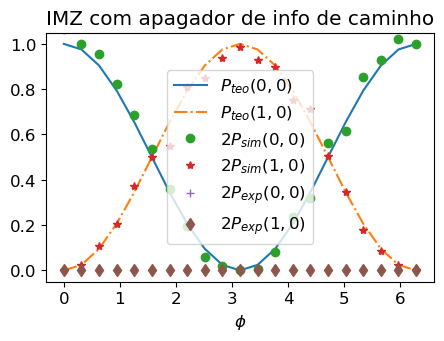

In [185]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,3.3), dpi = 100)
plt.plot(ph, PD0teo0, '-', label = r'$P_{teo}(0,0)$')
plt.plot(ph, PD0teo1, '-.', label = r'$P_{teo}(1,0)$')
plt.plot(ph, PD0sim0, 'o', label = r'$2P_{sim}(0,0)$')
plt.plot(ph, PD0sim1, '*', label = r'$2P_{sim}(1,0)$')
plt.plot(ph, PD0exp0, '+', label = r'$2P_{exp}(0,0)$')
plt.plot(ph, PD0exp1, 'd', label = r'$2P_{exp}(1,0)$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r'$\phi$'); plt.ylim(-0.05,1.05); 
plt.title('IMZ com apagador de info de caminho'); plt.show()

## Medidas na base de Bell
Os estados da base de Bell são
$$|\Phi_{\pm}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle\pm|11\rangle\big) \text{ e } |\Psi_{\pm}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle\pm|10\rangle\big).$$
Assim, podemos escrever os estados da base computacional em termos da base de Bell como segue:
\begin{align}
& |00\rangle = \frac{1}{\sqrt{2}}\big(|\Phi_{+}\rangle+|\Phi\rangle\big)\text{, } |11\rangle = \frac{1}{\sqrt{2}}\big(|\Phi_{+}\rangle-|\Phi\rangle\big), \\
& |01\rangle = \frac{1}{\sqrt{2}}\big(|\Psi_{+}\rangle+|\Psi_{-}\rangle\big) \text{, } |10\rangle = \frac{1}{\sqrt{2}}\big(|\Psi_{+}\rangle-|\Psi_{-}\rangle\big).
\end{align}

Notemos que a transformação unitária $C_{x}^{12}\big(H\otimes I\big)$ leva da base padrão para a base de Bell (__Exercício__: Verifique):
\begin{align}
C_{x}^{12}\big(H\otimes I\big)|00\rangle = |\Phi_{+}\rangle \text{, } C_{x}^{12}\big(H\otimes I\big)|01\rangle = |\Psi_{+}\rangle, \\
C_{x}^{12}\big(H\otimes I\big)|10\rangle = |\Phi_{-}\rangle \text{, } C_{x}^{12}\big(H\otimes I\big)|11\rangle = |\Psi_{-}\rangle.
\end{align}

A adjunta de $C_{x}^{12}\big(H\otimes I\big)$, que é $\big(H\otimes I\big)C_{x}^{12}$, leva então da base de Bell para a base computacional:
\begin{align}
\big(H\otimes I\big)C_{x}^{12}|\Phi_{+}\rangle= |00\rangle \text{, } \big(H\otimes I\big)C_{x}^{12}|\Psi_{+}\rangle = |01\rangle , \\
\big(H\otimes I\big)C_{x}^{12}|\Phi_{-}\rangle = |10\rangle \text{, } \big(H\otimes I\big)C_{x}^{12}|\Psi_{-}\rangle = |11\rangle.
\end{align}

In [186]:
def qc_MBB():
    qr = QuantumRegister(2); qc = QuantumCircuit(qr)
    qc.h(qr[0]); qc.cx(qr[0],qr[1])
    return qc
qc_MBB_ = qc_MBB(); qc_MBB_.draw()

┌───┐     
q2961708_0: ┤ H ├──■──
            └───┘┌─┴─┐
q2961708_1: ─────┤ X ├
                 └───┘

## Apagador quântico emaranhado
Vamos começar com o estado genuinamente emaranhado de 3 partes, que é obtido depois do DFP:
$$|\psi_{1}\rangle = \frac{1}{\sqrt{2}}\big(i|01\rangle_{AB}|1\rangle_{B'}+|10\rangle_{AB}|0\rangle_{B'}\big)|0\rangle_{A'}.$$

Com isso, obtemos
\begin{align}
|\psi_{1}\rangle & = \frac{1}{\sqrt{2}}\Big(i2^{-1/2}\big(|\Psi_{+}\rangle_{AB}+|\Psi_{-}\rangle_{AB}\big)|1\rangle_{B'}+2^{-1/2}\big(|\Psi_{+}\rangle_{AB}-|\Psi_{-}\rangle_{AB}\big)|0\rangle_{B'}\Big)|0\rangle_{A'} \\
& = \frac{1}{2}\Big(|\Psi_{+}\rangle_{AB}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) - |\Psi_{-}\rangle_{AB}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{A'}.
\end{align}
Vemos assim que uma medida seletiva na base de Bell apaga a informação de caminho, restaurando o comportamento ondulatório.

OBS: A implementação do apagador emaranhado no contexto óptico poderia ser realizada, a princípio, usando medidas na base de Bell parciais. Essas medidas exigem que os fótons passem por uma mesmo divisor de feixes, o que a princípio não seria um problema. Mas a necessidade de obsorver o fóton na detecção impossibilitaria a sequência do experimento.

Voltando para a análise do apagador quântico emaranhado, podemos escrever
\begin{align}
|\tilde{\psi}_{2}\rangle & = \big(H\otimes I\big)C_{x}^{12}|\psi_{1}\rangle \\
& = \frac{1}{2}\Big(|01\rangle_{AB}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) - |11\rangle_{AB}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{A'}.
\end{align}
Para o estado $|\tilde{\psi}_{2}\rangle$, se fazemos uma __medida projetiva__ na base computacional, com pós-seleção,  selecionaremos os seguintes estados para o modo espacial:
\begin{align}
& |01\rangle_{AB} \longrightarrow |\psi_{3,0}^{B'}\rangle = (|0\rangle_{B'}+i|1\rangle_{B'})/\sqrt{2} \text{ com prob 1/2},
 \\
& |11\rangle_{AB} \longrightarrow |\psi_{3,1}^{B'}\rangle = -i(|0\rangle_{B'}-i|1\rangle_{B'})/\sqrt{2} \text{ com prob 1/2}.
\end{align}

Novamente, fazendo as contas até depois do DF, obteremos
\begin{align}
& |\tilde{\psi}_{3,0}^{B'}\rangle = -\frac{1}{2}\big((1+e^{i\phi})|0\rangle_{B'}+i(1-e^{i\phi})|1\rangle_{B'}\big) \ \therefore\ Pr(D_{0})=(1+\cos\phi)/2\ \therefore\ V=1, \\
& |\tilde{\psi}_{3,1}^{B'}\rangle = -\frac{1}{2}\big((1-e^{i\phi})|0\rangle_{B'}+i(1+e^{i\phi})|1\rangle_{B'}\big) \ \therefore\ Pr(D_{0})=(1-\cos\phi)/2\ \therefore\ V=1.
\end{align}

In [ ]:
def qc_apagadorE(ph):
    qr = QuantumRegister(3); qc = QuantumCircuit(qr, name = 'apagador')
    state_prep_psip_ = state_prep_psip(); qc.append(state_prep_psip_, [qr[0],qr[1]]) # sprep
    qc_dfp_ = qc_dfp(); qc.append(qc_dfp_, [qr[1],qr[2]]) # DFP
    qc_pmo_ = qc_pmo(); qc.append(qc_pmo_, [qr[1],qr[2]]) # PMO
    qc_pqo_ = qc_pqo(); qc.append(qc_pqo_, [qr[0]]) # PQO
    qc_espelho_ = qc_espelho(); qc.append(qc_espelho_, [qr[2]]) # espelho
    qc_fase_ = qc_fase(ph); qc.append(qc_fase_, [qr[2]]) # fase
    qc_df_ = qc_df(); qc.append(qc_df_, [qr[2]]) # DF
    return qc
qc_apagador_ = qc_apagador(math.pi/3); qc_apagador_.draw()

# Operações condicionadas no resultado de medidas
Um pouco similar ao que estamos vendo aqui, e que alguns de vocês precisarão em seus trabalhos, é fazer uma ou outra transformação unitária em um qubit condicionado no resultado da medida de outro qubit.

Vamos ver alguns exemplos. Digamos que se o resultado da medida de $Z$ no qubit 1 for 0, temos que aplicar $Z$ no qubit 2. Se o resultado da medida de $Z$ no qubit 1 for 1, temos que aplicar $X$ no qubit 2. Como podemos fazer isso? <br>
É possível fazer isso através de operações controladas.

In [ ]:
qr = QuantumRegister(2); qc = QuantumCircuit(qr)
qc.h(qr[0]); qc.h(qr[0]); qc.s(qr[0])
qc.cz